In [ ]:
!pip install matplotlib numpy datetime pandas

In [ ]:
stock_data.plot()

In [ ]:
!pip install mplfinance

In [ ]:
# カラム名をリセット
stock_data.columns = stock_data.columns.droplevel(0)  # 最上位のカラム名を削除
stock_data.columns = ["Open", "High", "Low", "Close", "Volume"]  # カラム名を統一

In [ ]:
import mplfinance as mpf
import pandas as pd
import yfinance as yf

mpf.plot(stock_data, type="candle", volume=True, style="charles")

In [ ]:
# 移動平均
price = stock_data["Close"]
stock_data["sma25"] = price.rolling(window=25, min_periods=1).mean()
# sma75
stock_data["sma75"] = price.rolling(window=75, min_periods=1).mean()

In [ ]:
plt.plot(stock_data.index, stock_data["sma25"], label="sma25")
mpf.plot(stock_data, type="candle", volume=True, style="charles")

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from mplfinance.original_flavor import candlestick_ohlc

# stock_data が DataFrame であることを前提
# 必要なカラム: 'open', 'high', 'low', 'close', 'sma25'
# index は datetime 型とする

# 日付を数値化（candlestick_ohlc は日付を float で扱うため）
stock_data = stock_data.copy()  # 元データを変更しないようにコピー
stock_data["date"] = stock_data.index.map(mdates.date2num)

# グラフ描画
fig, ax = plt.subplots(figsize=(10, 6))

# ローソク足チャート
ohlc_data = stock_data[["date", "Open", "High", "Low", "Close"]].values
candlestick_ohlc(ax, ohlc_data, width=1, colorup="g", colordown="r")

# SMA のプロット
ax.plot(
    stock_data["date"],
    stock_data["sma25"],
    label="SMA25",
    color="blue",
    linewidth=0.7,
    alpha=1,
)

# 軸のフォーマット調整
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)

# 凡例を追加
ax.legend()

# タイトルとグリッド
plt.title("Candlestick Chart with SMA25")
plt.grid()

# グラフを表示
plt.show()

In [ ]:
print(stock_data)

[*********************100%***********************]  1 of 1 completed


Price        Close    High     Low    Open   Volume
Ticker      3133.T  3133.T  3133.T  3133.T   3133.T
Date                                               
2023-01-04   282.0   288.0   241.0   242.0  1675200
2023-01-05   285.0   293.0   268.0   279.0  1449600
2023-01-06   311.0   319.0   274.0   284.0  1507500
2023-01-10   340.0   341.0   317.0   326.0  1807900
2023-01-11   339.0   348.0   325.0   335.0   974800
...            ...     ...     ...     ...      ...
2025-01-28  1083.0  1111.0  1041.0  1050.0   589100
2025-01-29  1082.0  1104.0  1079.0  1089.0   446000
2025-01-30  1109.0  1142.0  1085.0  1099.0   841100
2025-01-31  1109.0  1133.0  1095.0  1103.0   508100
2025-02-03  1145.0  1145.0  1082.0  1095.0   640000

[511 rows x 5 columns]


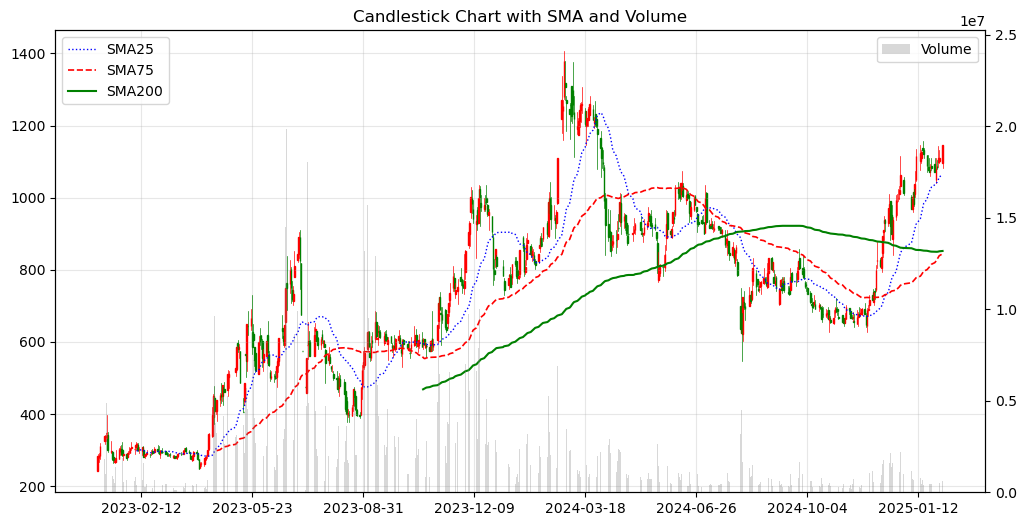

In [3]:
## 最終コード

import datetime

import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# 銘柄選定
ticker = "3133.T"
stock_data = yf.download(ticker, start="2023-01-01", end="2025-02-04")
print(stock_data)
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from mplfinance.original_flavor import candlestick_ohlc

# カラム名をリセット
stock_data.columns = stock_data.columns.droplevel(0)  # 最上位のカラム名を削除
stock_data.columns = ["Open", "High", "Low", "Close", "Volume"]  # カラム名を統一
# stock_data が DataFrame であることを前提
# 必要なカラム: 'open', 'high', 'low', 'close', 'volume'
# index は datetime 型とする

# stock_data をコピー
stock_data = stock_data.copy()

# SMA を計算
stock_data["sma25"] = stock_data["Close"].rolling(window=25).mean()
stock_data["sma75"] = stock_data["Close"].rolling(window=75).mean()
stock_data["sma200"] = stock_data["Close"].rolling(window=200).mean()

# 日付を数値化（candlestick_ohlc 用）
stock_data["Date"] = stock_data.index.map(mdates.date2num)

# グラフ描画
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- 価格チャート (ローソク足) ---
ohlc_data = stock_data[["Date", "Open", "High", "Low", "Close"]].values
candlestick_ohlc(ax1, ohlc_data, width=0.7, colorup="g", colordown="r")

# --- SMA ライン ---
ax1.plot(
    stock_data["Date"],
    stock_data["sma25"],
    label="SMA25",
    color="blue",
    linewidth=1,
    linestyle="dotted",
)
ax1.plot(
    stock_data["Date"],
    stock_data["sma75"],
    label="SMA75",
    color="red",
    linestyle="dashed",
    linewidth=1.2,
)
ax1.plot(
    stock_data["Date"],
    stock_data["sma200"],
    label="SMA200",
    color="green",
    linewidth=1.5,
)

# --- 出来高 (Volume) ---
ax2 = ax1.twinx()  # 2つ目のY軸を作成
ax2.bar(
    stock_data["Date"],
    stock_data["Volume"],
    color="gray",
    alpha=0.3,
    label="Volume",
    width=0.5,
)

# X軸フォーマット調整
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)

# 凡例を追加
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# タイトルとグリッド
ax1.set_title("Candlestick Chart with SMA and Volume")
ax1.grid(alpha=0.3)

# グラフを表示
plt.show()

[*********************100%***********************]  1 of 1 completed


TypeError: only length-1 arrays can be converted to Python scalars

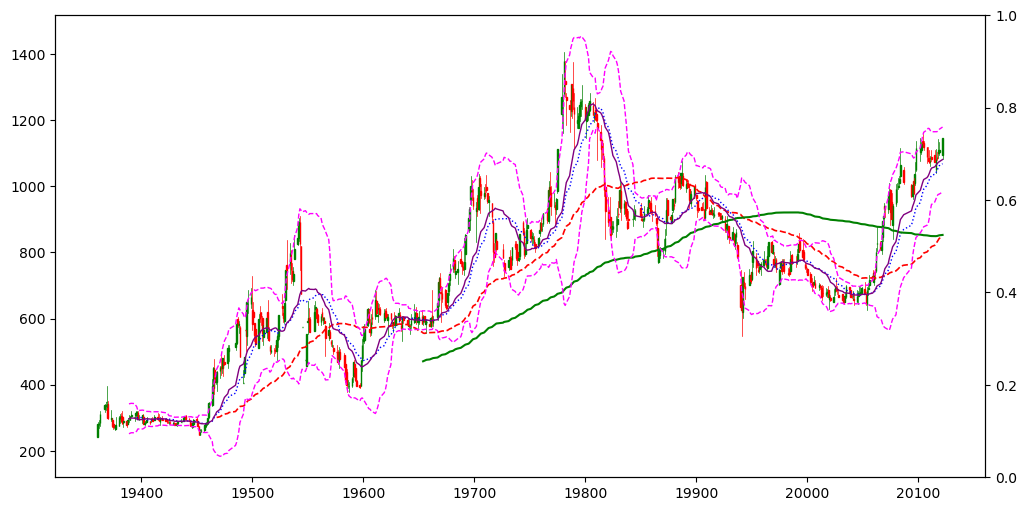

In [14]:
## SMA + ボリンジャーバンド + 出来高
import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from mplfinance.original_flavor import candlestick_ohlc

# 銘柄選定
ticker = "3133.T"
stock_data = yf.download(ticker, start="2023-01-01", end="2025-02-04")

# カラム名を統一
stock_data = stock_data[["Open", "High", "Low", "Close", "Volume"]].copy()

# --- 移動平均線 (SMA) の計算 ---
stock_data["sma25"] = stock_data["Close"].rolling(window=25).mean()
stock_data["sma75"] = stock_data["Close"].rolling(window=75).mean()
stock_data["sma200"] = stock_data["Close"].rolling(window=200).mean()

# --- ボリンジャーバンド (BB) の計算 ---
window = 20  # ボリンジャーバンドの期間
stock_data["sma20"] = stock_data["Close"].rolling(window=window).mean()
stock_data["std20"] = stock_data["Close"].rolling(window=window).std()
stock_data["upper_band"] = stock_data["sma20"] + (2 * stock_data["std20"])
stock_data["lower_band"] = stock_data["sma20"] - (2 * stock_data["std20"])

# 日付を数値化（candlestick_ohlc 用）
stock_data["Date"] = stock_data.index.map(mdates.date2num)

# --- グラフ描画 ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- 価格チャート (ローソク足) ---
ohlc_data = stock_data[["Date", "Open", "High", "Low", "Close"]].values
candlestick_ohlc(ax1, ohlc_data, width=0.7, colorup="g", colordown="r")

# --- 移動平均線 (SMA) ---
ax1.plot(
    stock_data["Date"],
    stock_data["sma25"],
    label="SMA25",
    color="blue",
    linewidth=1,
    linestyle="dotted",
)
ax1.plot(
    stock_data["Date"],
    stock_data["sma75"],
    label="SMA75",
    color="red",
    linestyle="dashed",
    linewidth=1.2,
)
ax1.plot(
    stock_data["Date"],
    stock_data["sma200"],
    label="SMA200",
    color="green",
    linewidth=1.5,
)

# --- ボリンジャーバンド (BB) ---
ax1.plot(
    stock_data["Date"], stock_data["sma20"], label="SMA20", color="purple", linewidth=1
)
ax1.plot(
    stock_data["Date"],
    stock_data["upper_band"],
    label="Upper Band",
    color="magenta",
    linestyle="dashed",
    linewidth=1,
)
ax1.plot(
    stock_data["Date"],
    stock_data["lower_band"],
    label="Lower Band",
    color="magenta",
    linestyle="dashed",
    linewidth=1,
)


# --- 出来高 (Volume) ---
ax2 = ax1.twinx()
ax2.bar(
    stock_data["Date"],
    stock_data["Volume"],
    color="gray",
    alpha=0.3,
    label="Volume",
    width=0.5,
)

# X軸フォーマット調整
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)

# 凡例を追加
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# タイトルとグリッド
ax1.set_title("Candlestick Chart with SMA, Bollinger Bands, and Volume")
ax1.grid(alpha=0.3)

# グラフを表示
plt.show()

[*********************100%***********************]  1 of 1 completed


TypeError: only length-1 arrays can be converted to Python scalars

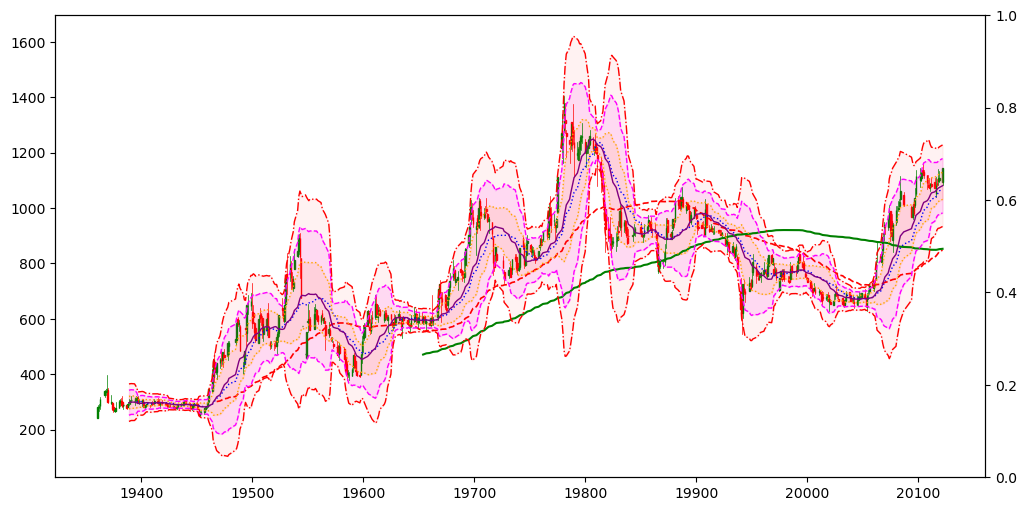

In [12]:
import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from mplfinance.original_flavor import candlestick_ohlc

# 銘柄選定
ticker = "3133.T"
stock_data = yf.download(ticker, start="2023-01-01", end="2025-02-04")

# カラム名を統一
stock_data = stock_data[["Open", "High", "Low", "Close", "Volume"]].copy()

# --- 移動平均線 (SMA) の計算 ---
stock_data["sma25"] = stock_data["Close"].rolling(window=25).mean()
stock_data["sma75"] = stock_data["Close"].rolling(window=75).mean()
stock_data["sma200"] = stock_data["Close"].rolling(window=200).mean()

# --- ボリンジャーバンド (BB) の計算 ---
window = 20  # ボリンジャーバンドの期間
stock_data["sma20"] = stock_data["Close"].rolling(window=window).mean()
stock_data["std20"] = stock_data["Close"].rolling(window=window).std()

# ±1σ, ±2σ, ±3σ の計算
stock_data["upper_1σ"] = stock_data["sma20"] + stock_data["std20"]
stock_data["lower_1σ"] = stock_data["sma20"] - stock_data["std20"]
stock_data["upper_2σ"] = stock_data["sma20"] + (2 * stock_data["std20"])
stock_data["lower_2σ"] = stock_data["sma20"] - (2 * stock_data["std20"])
stock_data["upper_3σ"] = stock_data["sma20"] + (3 * stock_data["std20"])
stock_data["lower_3σ"] = stock_data["sma20"] - (3 * stock_data["std20"])

# 日付を数値化（candlestick_ohlc 用）
stock_data["Date"] = stock_data.index.map(mdates.date2num)

# --- グラフ描画 ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- 価格チャート (ローソク足) ---
ohlc_data = stock_data[["Date", "Open", "High", "Low", "Close"]].values
candlestick_ohlc(ax1, ohlc_data, width=0.7, colorup="g", colordown="r")

# --- 移動平均線 (SMA) ---
ax1.plot(
    stock_data["Date"],
    stock_data["sma25"],
    label="SMA25",
    color="blue",
    linewidth=1,
    linestyle="dotted",
)
ax1.plot(
    stock_data["Date"],
    stock_data["sma75"],
    label="SMA75",
    color="red",
    linestyle="dashed",
    linewidth=1.2,
)
ax1.plot(
    stock_data["Date"],
    stock_data["sma200"],
    label="SMA200",
    color="green",
    linewidth=1.5,
)

# --- ボリンジャーバンド (BB) ---
ax1.plot(
    stock_data["Date"], stock_data["sma20"], label="SMA20", color="purple", linewidth=1
)

# ±1σ, ±2σ, ±3σ のラインを追加
ax1.plot(
    stock_data["Date"],
    stock_data["upper_1σ"],
    label="Upper 1σ",
    color="orange",
    linestyle="dotted",
    linewidth=1,
)
ax1.plot(
    stock_data["Date"],
    stock_data["lower_1σ"],
    label="Lower 1σ",
    color="orange",
    linestyle="dotted",
    linewidth=1,
)
ax1.plot(
    stock_data["Date"],
    stock_data["upper_2σ"],
    label="Upper 2σ",
    color="magenta",
    linestyle="dashed",
    linewidth=1,
)
ax1.plot(
    stock_data["Date"],
    stock_data["lower_2σ"],
    label="Lower 2σ",
    color="magenta",
    linestyle="dashed",
    linewidth=1,
)
ax1.plot(
    stock_data["Date"],
    stock_data["upper_3σ"],
    label="Upper 3σ",
    color="red",
    linestyle="dashdot",
    linewidth=1,
)
ax1.plot(
    stock_data["Date"],
    stock_data["lower_3σ"],
    label="Lower 3σ",
    color="red",
    linestyle="dashdot",
    linewidth=1,
)

# ボリンジャーバンドの範囲を塗りつぶし
ax1.fill_between(
    stock_data["Date"],
    stock_data["upper_1σ"],
    stock_data["lower_1σ"],
    color="orange",
    alpha=0.1,
)
ax1.fill_between(
    stock_data["Date"],
    stock_data["upper_2σ"],
    stock_data["lower_2σ"],
    color="magenta",
    alpha=0.1,
)
ax1.fill_between(
    stock_data["Date"],
    stock_data["upper_3σ"],
    stock_data["lower_3σ"],
    color="red",
    alpha=0.05,
)

# --- 出来高 (Volume) ---
ax2 = ax1.twinx()
ax2.bar(
    stock_data["Date"],
    stock_data["Volume"],
    color="gray",
    alpha=0.3,
    label="Volume",
    width=0.5,
)

# X軸フォーマット調整
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)

# 凡例を追加
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# タイトルとグリッド
ax1.set_title("Candlestick Chart with SMA, Bollinger Bands (±1σ, ±2σ, ±3σ), and Volume")
ax1.grid(alpha=0.3)

# グラフを表示
plt.show()

[*********************100%***********************]  1 of 1 completed
C:\Users\RY757\AppData\Local\Temp\ipykernel_22040\1962764386.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Volume"].fillna(0, inplace=True)
C:\Users\RY757\AppData\Local\Temp\ipykernel_22040\1962764386.py:138: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc="upper right")


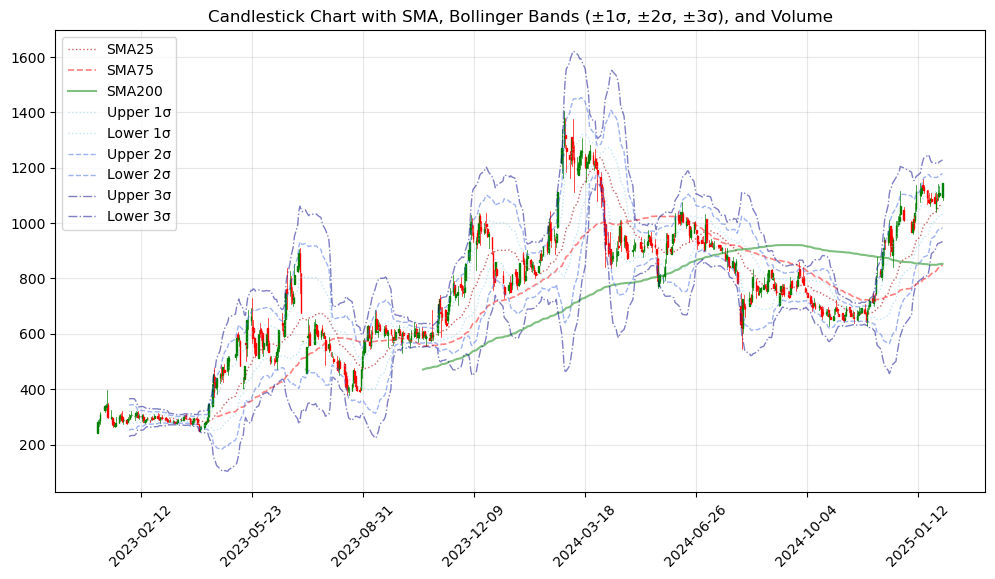

In [42]:
import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from mplfinance.original_flavor import candlestick_ohlc

# 銘柄選定
ticker = "3133.T"
stock_data = yf.download(ticker, start="2023-01-01", end="2025-02-04")

# カラム名を統一
stock_data = stock_data[["Open", "High", "Low", "Close", "Volume"]].copy()

# --- 出来高の NaN を 0 に変換 ---
stock_data["Volume"].fillna(0, inplace=True)

# --- 移動平均線 (SMA) の計算 ---
stock_data["sma25"] = stock_data["Close"].rolling(window=25).mean()
stock_data["sma75"] = stock_data["Close"].rolling(window=75).mean()
stock_data["sma200"] = stock_data["Close"].rolling(window=200).mean()

# --- ボリンジャーバンド (BB) の計算 ---
window = 20
stock_data["sma20"] = stock_data["Close"].rolling(window=window).mean()
stock_data["std20"] = stock_data["Close"].rolling(window=window).std()

stock_data["upper_1σ"] = stock_data["sma20"] + stock_data["std20"]
stock_data["lower_1σ"] = stock_data["sma20"] - stock_data["std20"]
stock_data["upper_2σ"] = stock_data["sma20"] + (2 * stock_data["std20"])
stock_data["lower_2σ"] = stock_data["sma20"] - (2 * stock_data["std20"])
stock_data["upper_3σ"] = stock_data["sma20"] + (3 * stock_data["std20"])
stock_data["lower_3σ"] = stock_data["sma20"] - (3 * stock_data["std20"])

# 日付を数値化
stock_data["Date"] = stock_data.index.map(mdates.date2num)

# --- グラフ描画 ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- 価格チャート (ローソク足) ---
ohlc_data = stock_data[["Date", "Open", "High", "Low", "Close"]].values
candlestick_ohlc(ax1, ohlc_data, width=0.7, colorup="g", colordown="r")

# --- 移動平均線 (SMA) ---
ax1.plot(
    stock_data["Date"],
    stock_data["sma25"],
    label="SMA25",
    color="firebrick",
    linewidth=1,
    linestyle="dotted",
    alpha=0.7,
)
ax1.plot(
    stock_data["Date"],
    stock_data["sma75"],
    label="SMA75",
    color="red",
    linestyle="dashed",
    linewidth=1.2,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["sma200"],
    label="SMA200",
    color="green",
    linewidth=1.5,
    alpha=0.5,
)

# --- ボリンジャーバンド (BB) --
ax1.plot(
    stock_data["Date"],
    stock_data["upper_1σ"],
    label="Upper 1σ",
    color="skyblue",
    linestyle="dotted",
    linewidth=1,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["lower_1σ"],
    label="Lower 1σ",
    color="skyblue",
    linestyle="dotted",
    linewidth=1,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["upper_2σ"],
    label="Upper 2σ",
    color="royalblue",
    linestyle="dashed",
    linewidth=1,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["lower_2σ"],
    label="Lower 2σ",
    color="royalblue",
    linestyle="dashed",
    linewidth=1,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["upper_3σ"],
    label="Upper 3σ",
    color="darkblue",
    linestyle="dashdot",
    linewidth=1,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["lower_3σ"],
    label="Lower 3σ",
    color="darkblue",
    linestyle="dashdot",
    linewidth=1,
    alpha=0.5,
)


# X軸フォーマット調整
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)

# 凡例を追加
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# タイトルとグリッド
ax1.set_title("Candlestick Chart with SMA, Bollinger Bands (±1σ, ±2σ, ±3σ), and Volume")
ax1.grid(alpha=0.3)

# グラフを表示
plt.show()

[*********************100%***********************]  1 of 1 completed
C:\Users\RY757\AppData\Local\Temp\ipykernel_22040\885095248.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Volume"].fillna(0, inplace=True)


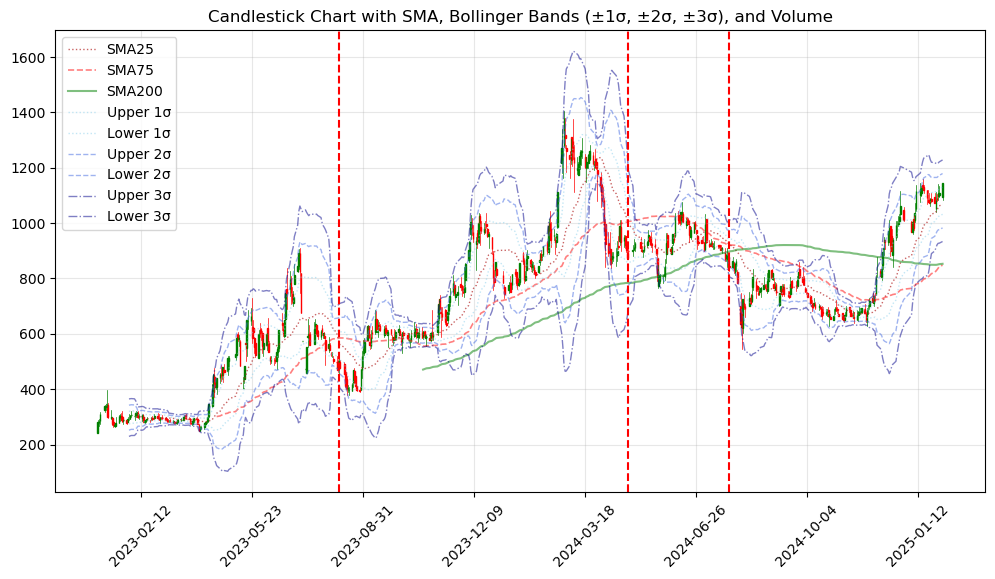

In [44]:
import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from mplfinance.original_flavor import candlestick_ohlc

# 銘柄選定
ticker = "3133.T"
stock_data = yf.download(ticker, start="2023-01-01", end="2025-02-04")

# カラム名を統一
stock_data = stock_data[["Open", "High", "Low", "Close", "Volume"]].copy()

# --- 出来高の NaN を 0 に変換 ---
stock_data["Volume"].fillna(0, inplace=True)

# --- 移動平均線 (SMA) の計算 ---
stock_data["sma25"] = stock_data["Close"].rolling(window=25).mean()
stock_data["sma75"] = stock_data["Close"].rolling(window=75).mean()
stock_data["sma200"] = stock_data["Close"].rolling(window=200).mean()

# --- ボリンジャーバンド (BB) の計算 ---
window = 20
stock_data["sma20"] = stock_data["Close"].rolling(window=window).mean()
stock_data["std20"] = stock_data["Close"].rolling(window=window).std()

stock_data["upper_1σ"] = stock_data["sma20"] + stock_data["std20"]
stock_data["lower_1σ"] = stock_data["sma20"] - stock_data["std20"]
stock_data["upper_2σ"] = stock_data["sma20"] + (2 * stock_data["std20"])
stock_data["lower_2σ"] = stock_data["sma20"] - (2 * stock_data["std20"])
stock_data["upper_3σ"] = stock_data["sma20"] + (3 * stock_data["std20"])
stock_data["lower_3σ"] = stock_data["sma20"] - (3 * stock_data["std20"])

# 日付を数値化
stock_data["Date"] = stock_data.index.map(mdates.date2num)

# ゴールデンクロスとデッドクロスを検出
golden_cross = []
dead_cross = []
for i in range(1, len(stock_data)):
    # ゴールデンクロス: SMA25がSMA75を越え、さらにSMA75がSMA200を越える
    if (
        stock_data["sma25"].iloc[i] > stock_data["sma75"].iloc[i]
        and stock_data["sma25"].iloc[i - 1] <= stock_data["sma75"].iloc[i - 1]
        and stock_data["sma75"].iloc[i] > stock_data["sma200"].iloc[i]
        and stock_data["sma75"].iloc[i - 1] <= stock_data["sma200"].iloc[i - 1]
    ):
        golden_cross.append(stock_data["Date"].iloc[i])
    elif (
        stock_data["sma25"].iloc[i] < stock_data["sma75"].iloc[i]
        and stock_data["sma25"].iloc[i - 1] >= stock_data["sma75"].iloc[i - 1]
    ):
        dead_cross.append(stock_data["Date"].iloc[i])

# --- グラフ描画 ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- 価格チャート (ローソク足) ---
ohlc_data = stock_data[["Date", "Open", "High", "Low", "Close"]].values
candlestick_ohlc(ax1, ohlc_data, width=0.7, colorup="g", colordown="r")

# --- 移動平均線 (SMA) ---
ax1.plot(
    stock_data["Date"],
    stock_data["sma25"],
    label="SMA25",
    color="firebrick",
    linewidth=1,
    linestyle="dotted",
    alpha=0.7,
)
ax1.plot(
    stock_data["Date"],
    stock_data["sma75"],
    label="SMA75",
    color="red",
    linestyle="dashed",
    linewidth=1.2,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["sma200"],
    label="SMA200",
    color="green",
    linewidth=1.5,
    alpha=0.5,
)

# --- ボリンジャーバンド (BB) ---
ax1.plot(
    stock_data["Date"],
    stock_data["upper_1σ"],
    label="Upper 1σ",
    color="skyblue",
    linestyle="dotted",
    linewidth=1,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["lower_1σ"],
    label="Lower 1σ",
    color="skyblue",
    linestyle="dotted",
    linewidth=1,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["upper_2σ"],
    label="Upper 2σ",
    color="royalblue",
    linestyle="dashed",
    linewidth=1,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["lower_2σ"],
    label="Lower 2σ",
    color="royalblue",
    linestyle="dashed",
    linewidth=1,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["upper_3σ"],
    label="Upper 3σ",
    color="darkblue",
    linestyle="dashdot",
    linewidth=1,
    alpha=0.5,
)
ax1.plot(
    stock_data["Date"],
    stock_data["lower_3σ"],
    label="Lower 3σ",
    color="darkblue",
    linestyle="dashdot",
    linewidth=1,
    alpha=0.5,
)

# --- ゴールデンクロス・デッドクロスの垂直線と上矢印 ---
for cross in golden_cross:
    ax1.axvline(x=cross, color="gold", linewidth=1.5, linestyle="--")
    # 上矢印の追加
    ax1.annotate(
        "^",
        xy=(cross, stock_data["sma25"].iloc[stock_data["Date"] == cross].values[0]),
        xytext=(
            cross,
            stock_data["sma25"].iloc[stock_data["Date"] == cross].values[0] * 1.02,
        ),
        color="gold",
        fontsize=12,
        ha="center",
        va="bottom",
    )

for cross in dead_cross:
    ax1.axvline(x=cross, color="red", linewidth=1.5, linestyle="--")

# X軸フォーマット調整
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)

# 凡例を追加
ax1.legend(loc="upper left")

# タイトルとグリッド
ax1.set_title("Candlestick Chart with SMA, Bollinger Bands (±1σ, ±2σ, ±3σ), and Volume")
ax1.grid(alpha=0.3)

# グラフを表示
plt.show()